In [1]:
import tools
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from scipy.optimize import curve_fit

In [3]:
zener= tools.files("../data/zenerIV.csv")

In [4]:
zener_data = np.array(zener.fobject,dtype=float)

In [5]:
zener_data_splited = np.split(zener_data,3,axis=1)

In [6]:
zener_current = zener_data_splited[2]*-1
zener_current = zener_current*10E-6
zener_voltage = zener_data_splited[1]*-1
source_voltage = zener_data_splited[0]
source_voltage[:,0]

array([2.5 , 2.6 , 2.7 , 2.8 , 2.9 , 3.  , 3.1 , 3.2 , 3.3 , 3.4 , 3.5 ,
       3.6 , 3.7 , 3.8 , 3.9 , 4.  , 4.1 , 4.2 , 4.3 , 4.4 , 4.5 , 4.6 ,
       4.7 , 4.8 , 4.81, 4.82, 4.83, 4.84, 4.85, 4.86, 4.87, 4.88, 4.89,
       4.9 , 4.91, 4.92, 4.93, 4.94, 4.95, 4.96, 4.97, 4.98, 4.99, 5.  ,
       5.01, 5.02, 5.03, 5.04, 5.05, 5.06, 5.07, 5.08, 5.09, 5.1 , 5.11,
       5.12, 5.13, 5.14, 5.15, 5.16, 5.17, 5.18, 5.19, 5.2 , 5.21, 5.22,
       5.23, 5.24, 5.25, 5.26, 5.27, 5.28, 5.29, 5.3 , 5.31, 5.32, 5.33,
       5.34, 5.35, 5.36])

In [7]:
def IVzener(x,Pz,c):
    return Pz*x+c

In [8]:
param, param_cov = curve_fit(IVzener, zener_voltage[69:,0], zener_current[69:,0])


In [9]:
module_array = np.arange(-5.7,-4.5,.1)*param[0]+param[1]
straight_line=np.ones(len(np.arange(-5.7,-4.5,.1)))*-5.4

/tmp/ipykernel_3605/118458728.py:14: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig,ax= plt.subplots()
/tmp/ipykernel_3605/118458728.py:17: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(np.arange(-5.7,-4.5,.1),module_array,"r-",label=f"{p1} $V_z$ + {p2}",linewidth=1,linestyle="dashed")


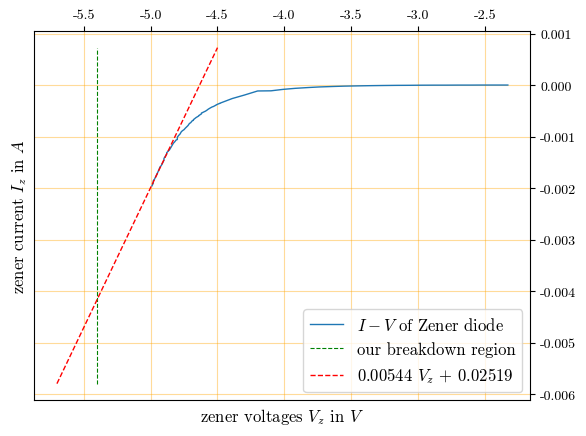

In [14]:
import matplotlib as mpl
import matplotlib.font_manager as font_manager

mpl.rcParams['font.family']='serif'
cmfont = font_manager.FontProperties(fname=mpl.get_data_path() + 'cmr10.ttf')
mpl.rcParams['font.serif']=cmfont.get_name()
mpl.rcParams['mathtext.fontset']='cm'
mpl.rcParams['axes.unicode_minus']=False
leg_font = font_manager.FontProperties(size=12)
font = {'color':'black','size':12}


p1,p2 = "{:.5f}".format(param[0]),"{:.5f}".format(param[1])
fig,ax= plt.subplots()
ax.plot(zener_voltage,zener_current,label="$I-V$ of Zener diode",linewidth=1)
ax.plot(straight_line,module_array,"g--",label="our breakdown region",linewidth=.8)
ax.plot(np.arange(-5.7,-4.5,.1),module_array,"r-",label=f"{p1} $V_z$ + {p2}",linewidth=1,linestyle="dashed")
# ax.set_title("I-V characteristic of zener diode",fontdict=font)
ax.set_xlabel("zener voltages $V_z$ in $V$",fontdict=font)
ax.set_ylabel("zener current $I_z$ in $A$",fontdict=font)
ax.yaxis.tick_right()
ax.xaxis.tick_top()
ax.grid(which="both",axis="both",color="orange",alpha=0.4)
ax.legend(prop= leg_font)
plt.savefig("zenerIV.png", dpi=700)